# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, precision_recall_fscore_support, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


sns.set()

## Load data

In [2]:
data = pd.read_csv("heart_desease.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Get some data statistics

In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Missing values

Missing values are a problem for the model. The algorithm has no idea how to interpret this values. As a general rule, if the missing values are

In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
count = 0
for i in data.isnull().sum():
    count += i
print('{:.2f} % of the data has some missing features. We will remove the rows in this case'.format(count*100/len(data.index)))

15.21 % of the data has some missing features. We will remove the rows in this case


### Remove the rows

In [7]:
data.dropna(axis=0,inplace=True)

In [8]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


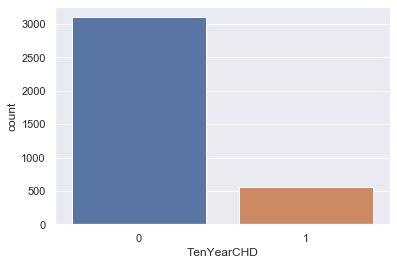

In [9]:
data.TenYearCHD.value_counts()

sns.countplot(x='TenYearCHD',data=data)

This have to be taken into account when analyzing the results. The data is skewed.

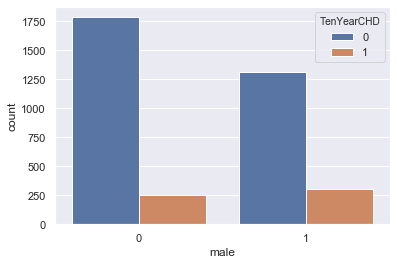

In [10]:
sns.countplot(x='male',data=data, hue='TenYearCHD')

There are fewer men than women and the proportion of men with future coronary disease seems to be higher than women.

## Logistic regression Stats Model

There is a package called Stats Model that can also perform simple analysis like Linear and Logistic Regression. This a more statistical software that yields more data and valuable information. <br>
With Sklearn it can also be computed but needs a bit more coding.

In [11]:
from statsmodels.tools import add_constant as add_constant

data_constant = add_constant(data) # add a constant for the intercept coefficient
data_constant.head()

C:\Users\Sergi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
#st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=data_constant.columns[:-1]
model=sm.Logit(data.TenYearCHD,data_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.1175
Time:                        13:02:21   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male                0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

This summary table is used to spot which features are not statistically relevant to predict the output. This is decided with the p-value column.<br>
The p-value is compared to an acceptance level that is set by the analyst. The usual value of alpha is 0.05. If the p-value of one feature is larger than alpha it means that the feature does not explain the value of the dependant variable we are trying to predict.<br>
In order to create a good model we have to remove all the features which have a p-value larger than alpha. But this cannot be made all at the same time. The correct way to do it is to remove the feature with the largest p-value and then run the model again and calculate the p-values. And keep removing the largest one if greater than 0.05.

## Logistic regression Sklearn

Here we will calculate the p-value of the features using Sklearn and some functions. This is an alternative way of doing it without having to use the package Stats Model

### Assign features to 'x' and the predicted variable to 'y'

In [13]:
x=np.array(data.drop(["TenYearCHD"], axis=1))
y=np.array(data["TenYearCHD"])
print(x.shape)
print(y.shape)

(3658, 15)
(3658,)


### Fit the Logistic Regression

In [14]:
# Create the model
logreg=LogisticRegression(solver='lbfgs', max_iter=10000)
# Fit the data
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Function to calculate p-value

In [15]:
from scipy.stats import norm
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

### Compute p-value

In [16]:
p=logit_pvalue(logreg,x)

p_value=pd.DataFrame(cols, columns=['Features'])

p_value['p-value Sklearn']= p

In [17]:
# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(x)).fit(disp=0)
a=np.asarray(sm_model.pvalues)
p_value['p-value statsmodel']=a
p_value

,Features,p-value Sklearn,p-value statsmodel
0,const,0.000000e+00,2.566039e-31
1,male,7.086946e-07,3.528866e-07
2,age,0.000000e+00,1.921049e-21
3,education,3.094627e-01,3.335308e-01
4,currentSmoker,6.825944e-01,6.478285e-01
5,cigsPerDay,3.548661e-03,4.083450e-03
6,BPMeds,4.941249e-01,4.880213e-01
7,prevalentStroke,1.521874e-01,1.565187e-01
8,prevalentHyp,8.143455e-02,8.972781e-02
9,diabetes,9.823100e-01,9.012046e-01


### Loop removing p-values larger than 0.05

In [18]:
columns = list(cols)

In [19]:
index=[]
while(np.amax(p)>0.05):    
    result = np.where(p == np.amax(p))
    p = np.delete(p,result[0][0],0)
    x = np.delete(x,result[0][0]-1,1)
    del columns[result[0][0]]
    
    logreg.fit(x,y)
    p=logit_pvalue(logreg,x)
    
    
    index.append(result[0][0])

### Split between train and test set

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

### Fit the Logistic Regression with training set

In [21]:
logreg=LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Confusion matrix

Check precision, recall and F1-score. The model was skewed towards 0. Which means that prediction all 0 would give a high accuracy. This means that the model is prone to predicting false negatives.

In [22]:
y_pred=logreg.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[621,   7],
       [ 96,   8]], dtype=int64)

The model predicted 96 false negatives.

### Test the test set

In [23]:
acc = logreg.score(x_test,y_test)*100
recall = recall_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
f1score = f1_score(y_test, y_pred)*100
prf = precision_recall_fscore_support(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(acc))
print('Recall: {:.2f}%'.format(recall))
print('Precision: {:.2f}%'.format(precision))
print('F1 score: {:.2f}%'.format(f1score))

# Alternatively, use this function
# print(prf)

Accuracy: 85.93%
Recall: 7.69%
Precision: 53.33%
F1 score: 13.45%


Accuracy is not a good indicator for this example.

### Modify threshold

In [24]:
threshold = [0.1, 0.2, 0.3, 0.4]

for e in threshold:
    y_pred = np.where(logreg.predict_proba(x_test)[:,1] > e, 1,0)
    prf = precision_recall_fscore_support(y_test, y_pred)
    print('Threshold: {}'.format(e))
    print('Precision: {:.2f} %'.format(prf[0][1]*100))
    print('Recall: {:.2f} %'.format(prf[1][1]*100))
    print('F1 score: {:.2f} %\n'.format(prf[2][1]*100))

Threshold: 0.1
Precision: 21.05 %
Recall: 84.62 %
F1 score: 33.72 %

Threshold: 0.2
Precision: 27.55 %
Recall: 51.92 %
F1 score: 36.00 %

Threshold: 0.3
Precision: 33.00 %
Recall: 31.73 %
F1 score: 32.35 %

Threshold: 0.4
Precision: 41.86 %
Recall: 17.31 %
F1 score: 24.49 %



In [25]:
# Confusion matrix with threshold 0.1
y_pred = np.where(logreg.predict_proba(x_test)[:,1] > 0.1, 1,0)
confusion_matrix(y_test, y_pred)

array([[298, 330],
       [ 16,  88]], dtype=int64)

Now the model is better at detecting possible future heart diseases. There are also more false positives detected but in this model could be argued that a false positive can not be harmful for the patient. More tests can be run and then be discarded of possible coronary disease in 10 years.<br>
Otherwise, it is worse to be tagged as a false negative because then the patient will not take measures and quit smoking or run more tests.

### Area below ROC curve

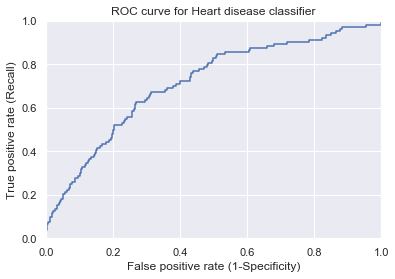

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Recall)')
plt.grid(True)

An area below the ROC curve of 0.5 means the model is not better than a random classification. The closest to 1, the better the model.

In [27]:
sklearn.metrics.roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])

0.7145088192062714

# Train final model

In [28]:
# Train using all the data
logreg.fit(x,y)

# Confusion matrix with threshold 0.1
y_pred = np.where(logreg.predict_proba(x)[:,1] > 0.1, 1,0)
confusion_matrix(y, y_pred)


array([[1442, 1659],
       [  83,  474]], dtype=int64)

In [29]:
prf = precision_recall_fscore_support(y, y_pred)
print('Threshold: {}'.format(0.1))
print('Precision: {:.2f} %'.format(prf[0][1]*100))
print('Recall: {:.2f} %'.format(prf[1][1]*100))
print('F1 score: {:.2f} %\n'.format(prf[2][1]*100))

Threshold: 0.1
Precision: 22.22 %
Recall: 85.10 %
F1 score: 35.24 %



In [33]:
Results=pd.DataFrame(columns[1:], columns=['Features'])
Results['Coefficients']=np.exp(logreg.coef_[0])

In [34]:
Results

,Features,Coefficients
0,male,1.742510
1,age,1.068196
2,cigsPerDay,1.019496
3,totChol,1.002273
4,sysBP,1.017666
5,glucose,1.007311
